In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
DATASET_ENCODING = "ISO-8859-1"
names =['target','ids','date','flag','user','text']
df = pd.read_csv('data.csv', encoding=DATASET_ENCODING, names = names)

In [ ]:
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
df.shape

(1600000, 6)

In [ ]:
df['flag'].unique()

array(['NO_QUERY'], dtype=object)

In [ ]:
df.duplicated().any()

False

In [ ]:
df['target'].unique()

array([0, 4], dtype=int64)

<AxesSubplot:>

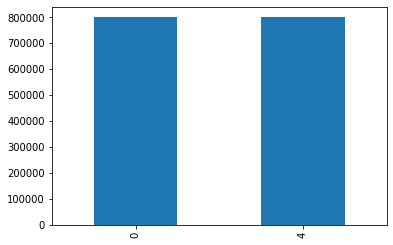

In [ ]:
df['target'].value_counts().plot(kind = 'bar')

In [ ]:
# To do sentiment analysis we need only two columns ie. target and text
df.drop(df.columns[1:-1], axis = 1, inplace = True)

In [ ]:
df.head()

,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [ ]:
df['text'].loc[0]

"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"

In [ ]:
df['text'].loc[2312]

'@x0mrsjoejonas im okay.. Im just really really missing my best friend '

### Data cleaning

In [ ]:
# Every tweets are starting with username which is of no use here
# There are also some urls

# Removing the username
def remove_username_and_urls(sentence):
    new_sentence = re.sub(r'^@[^\s]+','', sentence)
    new_sentence = re.sub(r'http[^\s]+', '', new_sentence)
    
    # also lowering the all characters
    return new_sentence.lower().strip()

In [ ]:
df['text'] = df['text'].apply(lambda sentence : remove_username_and_urls(sentence))

In [ ]:
df.head()

,target,text
0,0,"- awww, that's a bummer. you shoulda got davi..."
1,0,is upset that he can't update his facebook by ...
2,0,i dived many times for the ball. managed to sa...
3,0,my whole body feels itchy and like its on fire
4,0,"no, it's not behaving at all. i'm mad. why am ..."


In [ ]:
stop_words = stopwords.words('english')
def remove_stopwords(sentence):
    new_sentence = []
    for word in sentence.split():
        if word not in stop_words:
            new_sentence.append(word)
    return ' '.join(new_sentence)

In [ ]:
df['text'] = df['text'].apply(lambda x: remove_stopwords(x))

In [ ]:
df.head()

,target,text
0,0,"- awww, that's bummer. shoulda got david carr ..."
1,0,upset can't update facebook texting it... migh...
2,0,dived many times ball. managed save 50% rest g...
3,0,whole body feels itchy like fire
4,0,"no, behaving all. i'm mad. here? can't see there."


In [ ]:
## Now removing all the symbols and digits from text
df['text'] = df['text'].apply(lambda x : re.sub(r'[^a-zA-Z]', ' ', x))

In [ ]:
df.head()

,target,text
0,0,awww that s bummer shoulda got david carr ...
1,0,upset can t update facebook texting it migh...
2,0,dived many times ball managed save rest g...
3,0,whole body feels itchy like fire
4,0,no behaving all i m mad here can t see there


## Stemming the words

In [ ]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
def stemming_words(sentence):
    word_list = []
    for word in sentence.split():
        word_list.append(stemmer.stem(word))
    return ' '.join(word_list)

In [ ]:
df['text'] = df['text'].apply(lambda x : stemming_words(x))

In [ ]:
df.to_csv('cleaned_data.csv')

# Reading saved data

In [3]:
df = pd.read_csv('cleaned_data.csv')
df.drop('Unnamed: 0', axis =1, inplace = True)

In [4]:
df.head()

,target,text
0,0,awww that s bummer shoulda got david carr thir...
1,0,upset can t updat facebook text it might cri r...
2,0,dive mani time ball manag save rest go bound
3,0,whole bodi feel itchi like fire
4,0,no behav all i m mad here can t see there


In [5]:
df['target'] = df['target'].map({0:0, 4:1})

In [6]:
df['target'].unique()

array([0, 1])

In [7]:
df['target'].value_counts()

0    800000
1    800000
Name: target, dtype: int64

## Train-test-split

In [8]:
positive_df = df[df['target'] == 1]
negative_df = df[df['target'] == 0]

In [9]:
positive_df['target'].value_counts(), negative_df['target'].value_counts() 

(1    800000
 Name: target, dtype: int64, 0    800000
 Name: target, dtype: int64)

In [10]:
## Taking 80% for training and 20% for testing
training_size = int(0.8*(len(positive_df)))
training_size

640000

In [11]:
## Dividing the positive and negative into training and testing set
pos_train = positive_df.iloc[:training_size]
pos_test = positive_df.iloc[training_size:]
pos_train.shape, pos_test.shape

((640000, 2), (160000, 2))

In [12]:
pos_train.head(3)

,target,text
800000,1,love health uandpet u guy r best
800001,1,im meet one besti tonight cant wait girl talk
800002,1,thank twitter add sunisa got meet hin show dc ...


In [13]:
pos_test.head(3)

,target,text
1440000,1,i lowli freshman take heed thi
1440001,1,love u to nick j sudmuffin
1440002,1,hehe blame away new wip ftw


In [14]:
neg_train = negative_df.iloc[:training_size]
neg_test = negative_df.iloc[training_size:]
neg_train.shape, neg_test.shape

((640000, 2), (160000, 2))

In [15]:
neg_train.head(3)

,target,text
0,0,awww that s bummer shoulda got david carr thir...
1,0,upset can t updat facebook text it might cri r...
2,0,dive mani time ball manag save rest go bound


In [16]:
neg_test.head(3)

,target,text
640000,0,see lightn outsid realli mind unless babi besi...
640001,0,burnt top mouth realli hurt
640002,0,tri opera mobil b keep lock htc squarespac


In [17]:
# Combining both positive and negative dataframe of training
training_df = pd.concat([pos_train, neg_train])
training_df.head()

,target,text
800000,1,love health uandpet u guy r best
800001,1,im meet one besti tonight cant wait girl talk
800002,1,thank twitter add sunisa got meet hin show dc ...
800003,1,sick realli cheap hurt much eat real food plu ...
800004,1,effect everyon


In [18]:
training_df.isna().sum()

target       0
text      4489
dtype: int64

In [19]:
training_df.dropna(axis = 0, inplace = True)

In [87]:
training_df.drop_duplicates(keep = 'first', inplace = True)

In [88]:
training_df.duplicated().any()

False

In [20]:
## Combining testing dataframe
testing_df = pd.concat([pos_test, neg_test])
testing_df.head()

,target,text
1440000,1,i lowli freshman take heed thi
1440001,1,love u to nick j sudmuffin
1440002,1,hehe blame away new wip ftw
1440003,1,go soon
1440004,1,yay


In [21]:
## Randomizing the training df
training_df = training_df.sample(training_df.shape[0])

In [22]:
training_df.head()

,target,text
295753,0,scare new dig haunt
570255,0,sad other get updat come yet
390528,0,weather make sad today
129873,0,today tough monday unfortun exam project due w...
1347306,1,thank you appreci wrote


In [23]:
testing_df.isna().sum()

target       0
text      1012
dtype: int64

In [24]:
testing_df.dropna(axis = 0, inplace = True)

In [91]:
testing_df.drop_duplicates(keep = 'first', inplace= True)

In [92]:
testing_df.duplicated().any()

False

In [93]:
X_train, y_train = training_df['text'], training_df['target']
X_test, y_test = testing_df['text'], testing_df['target']

## Now vectorizing the sentences

In [94]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [95]:
tk = Tokenizer(oov_token='<OOV_TOKEN>')
tk.fit_on_texts(X_train)

In [96]:
word_length = len(tk.word_index) ## Total no of words

In [97]:
train_seq = tk.texts_to_sequences(X_train)
test_seq = tk.texts_to_sequences(X_test)

In [98]:
max_length = max([len(seq) for seq in train_seq])

In [99]:
def padding(sequence):
    return pad_sequences(sequence, maxlen = max_length, padding='post', truncating='post')

In [100]:
X_train_pad = padding(train_seq)
X_train_pad.shape

(1199654, 52)

In [101]:
X_test_pad = padding(test_seq)
X_test_pad.shape

(304205, 52)

# Model building

In [102]:
from tensorflow.keras.layers import LSTM, Embedding, Dense, Dropout, Flatten, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import Callback

In [103]:
embedding_dim = 16
model = Sequential([
    Embedding(word_length, embedding_dim, input_length=max_length),
    LSTM(32, return_sequences=True),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [104]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 52, 16)            3697168   
                                                                 
 lstm_8 (LSTM)               (None, 52, 32)            6272      
                                                                 
 dropout_8 (Dropout)         (None, 52, 32)            0         
                                                                 
 dense_11 (Dense)            (None, 52, 64)            2112      
                                                                 
 dense_12 (Dense)            (None, 52, 1)             65        
                                                                 
Total params: 3,705,617
Trainable params: 3,705,617
Non-trainable params: 0
_________________________________________________________________


In [105]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [106]:
class CustomSaver(Callback):
    prev_acc = 0
    prev_val_acc = 0
    def on_epoch_end(self, epoch, logs={}):
        new_acc = logs.get('accuracy')
        new_val_acc = logs.get('val_accuracy')

        if new_acc > 95.0:
            print("Accuracy is reached {:.2f}".format(logs.get('accuracy')))
            self.model.stop_training = True

        if new_val_acc < self.prev_val_acc and abs(new_val_acc - new_acc) > 0.05:
            self.model.stop_training = True
        else:
            if new_acc > self.prev_acc:
                self.prev_acc = new_acc
              
            if new_val_acc > self.prev_val_acc:
                self.prev_val_acc = new_val_acc
                self.model.save("_new_model/model_{}.hd5".format(epoch))

        

In [107]:
epochs = 50
history = model.fit(X_train_pad, y_train,
                    epochs= epochs,
                    batch_size = 64,
                    validation_data=(X_test_pad, y_test),
                    callbacks=[CustomSaver()])

Epoch 1/50
18744/18745 [============================>.] - ETA: 0s - loss: 0.4979 - accuracy: 0.7567

INFO:tensorflow:Assets written to: _new_model/model_0.hd5/assets


INFO:tensorflow:Assets written to: _new_model/model_0.hd5/assets


18745/18745 [==============================] - 176s 9ms/step - loss: 0.4979 - accuracy: 0.7567 - val_loss: 0.4874 - val_accuracy: 0.7642
Epoch 2/50
18744/18745 [============================>.] - ETA: 0s - loss: 0.4591 - accuracy: 0.7813

INFO:tensorflow:Assets written to: _new_model/model_1.hd5/assets


INFO:tensorflow:Assets written to: _new_model/model_1.hd5/assets


18745/18745 [==============================] - 172s 9ms/step - loss: 0.4591 - accuracy: 0.7813 - val_loss: 0.4867 - val_accuracy: 0.7658
Epoch 3/50
18745/18745 [==============================] - 169s 9ms/step - loss: 0.4349 - accuracy: 0.7960 - val_loss: 0.4881 - val_accuracy: 0.7635
Epoch 4/50
18745/18745 [==============================] - 169s 9ms/step - loss: 0.4108 - accuracy: 0.8102 - val_loss: 0.4958 - val_accuracy: 0.7608
Epoch 5/50
18745/18745 [==============================] - 168s 9ms/step - loss: 0.3892 - accuracy: 0.8211 - val_loss: 0.5045 - val_accuracy: 0.7559


In [ ]:
import joblib
from google.colab import files

In [ ]:
files.download('model/model_1.hd5')

In [ ]:
joblib.dump(model, open('model.pkl', 'wb'))


files.download('model')

## Vectorizing the sentence for machine learning

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [ ]:
cv = CountVectorizer()
X_train_cv = cv.fit_transform(X_train)
X_train_cv.shape, y_train.shape

In [ ]:
X_test_cv = cv.transform(X_test)
X_test_cv.shape

In [ ]:
tf = TfidfVectorizer()
X_train_tf = tf.fit_transform(X_train)
X_test_tf = tf.transform(X_test)

## Model Training

In [122]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
model = MultinomialNB()
model.fit(X_train_cv, y_train)
print("Accuracy score of training : ", accuracy_score(model.predict(X_train_cv), y_train))
pred = model.predict(X_test_cv)
print("Test accuracy : ", accuracy_score(pred, y_test))
print("Classification report of test data : \n", classification_report(pred, y_test))

In [ ]:
model = MultinomialNB()
model.fit(X_train_tf, y_train)
print("Accuracy score of training : ", accuracy_score(model.predict(X_train_tf), y_train))
pred = model.predict(X_test_tf)
print("Test accuracy : ", accuracy_score(pred, y_test))
print("Classification report of test data : \n", classification_report(pred, y_test))